In [1]:
from keras.models import Sequential

In [2]:
from keras.layers import Conv2D

In [3]:
from keras.layers import MaxPooling2D

In [4]:
from keras.layers import Flatten

In [5]:
from keras.layers import Dense

In [6]:
import matplotlib.pyplot as plt

In [7]:
classifier = Sequential()

In [8]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [10]:
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

In [11]:
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [12]:
classifier.add(Flatten())

In [13]:
classifier.add(Dense(units = 128, activation = 'relu'))

In [14]:
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [15]:
#from keras.optimizers import SGD
classifier.compile(optimizer = "adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [17]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
from google.colab import files
uploaded = files.upload()

Saving Mangoes-20251123T055343Z-1-001.zip to Mangoes-20251123T055343Z-1-001.zip


In [20]:
!unzip Mangoes-20251123T055343Z-1-001.zip -d /content/

Archive:  Mangoes-20251123T055343Z-1-001.zip
   creating: /content/Mangoes/V/Riped/
  inflating: /content/Mangoes/download-Unripe.jfif  
  inflating: /content/Mangoes/Validation Data/images (13).jpg  
  inflating: /content/Mangoes/Validation Data/images (16).jpg  
  inflating: /content/Mangoes/Validation Data/images (15).jpg  
  inflating: /content/Mangoes/download.jfif  
  inflating: /content/Mangoes/Validation Data/images (19).jpg  
  inflating: /content/Mangoes/Validation Data/images (21).jpg  
  inflating: /content/Mangoes/Validation Data/images (11).jpg  
  inflating: /content/Mangoes/Validation Data/images (9).jpg  
  inflating: /content/Mangoes/Validation Data/images (8).jpg  
  inflating: /content/Mangoes/Validation Data/images (10).jpg  
  inflating: /content/Mangoes/Validation Data/images (18).jpg  
  inflating: /content/Mangoes/Validation Data/images (14).jpg  
  inflating: /content/Mangoes/Validation Data/images (7).jpg  
  inflating: /content/Mangoes/Validation Data/images

In [24]:
training_set = train_datagen.flow_from_directory('/content/Mangoes/Train Data',
                                                 target_size = (64, 64),class_mode = 'binary')

Found 254 images belonging to 2 classes.


In [25]:
test_set = test_datagen.flow_from_directory('/content/Mangoes/Test Data',
                                            target_size = (64, 64),class_mode = 'binary')

Found 60 images belonging to 2 classes.


In [26]:
classifier.fit(training_set,
epochs = 10,
batch_size=32
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.6609 - loss: 0.6526
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 321ms/step - accuracy: 0.8724 - loss: 0.3921
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.8944 - loss: 0.2530
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 203ms/step - accuracy: 0.8885 - loss: 0.2325
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 210ms/step - accuracy: 0.8881 - loss: 0.2485
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.9472 - loss: 0.1506
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.9453 - loss: 0.1647
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.9611 - loss: 0.1245
Epoch 9/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.9432 - loss: 0.1667
Epoch 10/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - accuracy: 0.9754 - loss: 0.1049


In [27]:
print("Result:",classifier.predict(test_set))
#A=classifier.predict(test_set)
loss, accuracy = classifier.evaluate(test_set)
print("Loss:", loss)
print("Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Result: [[0.02194647]
 [0.03451397]
 [0.08022579]
 [0.5752441 ]
 [0.9999615 ]
 [0.03881813]
 [0.02718405]
 [0.03614116]
 [0.99918634]
 [0.9999599 ]
 [0.99980056]
 [0.99711466]
 [0.08856505]
 [0.99999976]
 [0.16497439]
 [0.02523017]
 [0.04594193]
 [0.9998609 ]
 [0.90313077]
 [0.9994987 ]
 [0.09283399]
 [0.99876934]
 [0.997981  ]
 [0.97897947]
 [0.02589847]
 [0.9994593 ]
 [0.0607762 ]
 [0.02798077]
 [0.10676558]
 [0.997323  ]
 [0.9971673 ]
 [0.18484949]
 [0.9998925 ]
 [0.0169521 ]
 [0.9962438 ]
 [0.9999786 ]
 [0.05014427]
 [0.9972264 ]
 [0.9999902 ]
 [0.0169521 ]
 [0.3409283 ]
 [0.99811333]
 [0.02777718]
 [0.99999696]
 [0.06138833]
 [0.9986254 ]
 [0.24734752]
 [0.9999727 ]
 [0.99916434]
 [0.00818686]
 [0.99989676]
 [0.9999893 ]
 [0.9999798 ]
 [0.37874988]
 [0.9844262 ]
 [0.03198424]
 [0.998248  ]
 [0.9948778 ]
 [0.04504538]
 [0.02150648]]
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9674 - loss: 0.1948 
Loss: 0.16472125053405762
Accuracy: 0.9

In [28]:
class_indices = training_set.class_indices
print("Class indices:", class_indices)


Class indices: {'Riped Mangoes': 0, 'Unriped Mangoes': 1}


In [29]:
class_indices = test_set.class_indices
print("Class indices:", class_indices)


Class indices: {'Riped Mangoes': 0, 'Unriped Mangoes': 1}


In [30]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 6.9 MB/s eta 0:00:00


In [31]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

def build_model(hp):
    model = Sequential([
        Input(shape=(64, 64, 3)),
        Conv2D(filters=hp.Int('conv_1_filter', min_value=16, max_value=64, step=16),
               kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(filters=hp.Int('conv_2_filter', min_value=16, max_value=64, step=16),
               kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(units=hp.Int('dense_1_units', min_value=32, max_value=256, step=32), activation='relu'),
        Dense(units=1, activation='sigmoid')
    ])

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [32]:
from keras_tuner import GridSearch

tuner = GridSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
)

In [33]:
tuner.search(training_set, epochs=10, validation_data=test_set)


Trial 5 Complete [00h 00m 19s]
val_accuracy: 0.5

Best val_accuracy So Far: 0.9833333492279053
Total elapsed time: 00h 01m 45s


In [34]:
best_model = tuner.get_best_models(num_models=1)[0]

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [35]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       200,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,601 (795.32 KB)

 Trainable params: 203,601 (795.32 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
loss, accuracy = best_model.evaluate(test_set)
print("Loss:", loss)
print("Accuracy:", accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9785 - loss: 0.1872 
Loss: 0.1644996702671051
Accuracy: 0.9833333492279053


In [37]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
for hp, value in best_hyperparameters.values.items():
    print(f"  {hp}: {value}")

  conv_1_filter: 16
  conv_2_filter: 16
  dense_1_units: 64
  optimizer: adam


In [38]:
import numpy as np

In [39]:
from keras.preprocessing import image

In [40]:
#img = image.load_img(val_img_file, target_size=(224, 224))
#print(type(img))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
------------------------------------------------------------
Mangoes are good and not expected to ripe soon!
------------------------------------------------------------


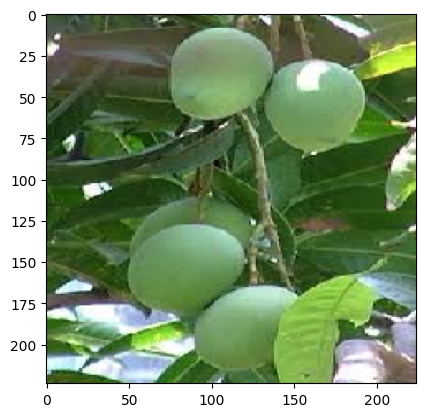

In [44]:
val_img_file = '/content/Mangoes/Test Data/Unriped Mangoes/images (52).jpg'
#test_image = image.load_img(val_img_file, target_size = (64, 64))
#test_image = image.img_to_array(test_image)
#test_image = np.expand_dims(test_image, axis = 0)
#result = classifier.predict(test_image)
test_image = image.load_img(val_img_file, target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

result = best_model.predict(test_image)
#print(float(result))
print(60*'-')
if (result[0][0]<=0.5):
  print("Mangoes are expected to ripe soon!")
else:
  print("Mangoes are good and not expected to ripe soon!")
print(60*'-')
"""class_dict = {0:'stage1', 1 : 'stage2'}
days_dict = {0:'0-5', 1 : '5-10'}
[print(class_dict[i],':', round(result[0][i], 3)) for i in range(len(result[0]))]
training_set.class_indices"""
#print(60*'-')
#print('Mangoes are currently in {} and expected to ripe in {}.'.format(class_dict[np.argmax(result)],days_dict[arg_max]))
arg_max = np.argmax(result)
#print(60*'-')

img = image.load_img(val_img_file, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(x/255.)


In [ ]:
"""class_dict = {0:'stage1', 1 : 'stage2'}
days_dict = {0:'0-5', 1 : '5-10'}
[print(class_dict[i],':', round(result[0][i], 3)) for i in range(len(result[0]))]
training_set.class_indices
print(60*'-')
print('Mangoes are currently in {} and expected to ripe in {}.'.format(class_dict[np.argmax(result)],days_dict[arg_max]))
arg_max = np.argmax(result)
print(60*'-')

img = image.load_img(val_img_file, target_size=(224, 224))
x = image.img_to_array(img)
plt.imshow(x/255.)"""